# Modelling #2

In this notebook, I'll be completing the modelling section of my project.

## Data Loading

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train_s = pd.read_pickle('data1/X_train_s.pkl')
X_val_s = pd.read_pickle('data1/X_val_s.pkl')
X_test_s = pd.read_pickle('data1/X_test_s.pkl')
y_train = pd.read_pickle('data1/y_train.pkl')
y_val = pd.read_pickle('data1/y_val.pkl')
y_test = pd.read_pickle('data1/y_test.pkl')
df=pd.read_pickle("data1/df.pkl")

### Dealing with `highest_ever_market_value`

There is a big issue with the feature `highest_ever_market_value`.

What would I do if I had a player in my dataset without a prior valuation? I wouldnt be able to put them into my model. This is detrimental as one of the primary reasons for the development of this model is to get new players valuated efficiently and accurately. This information is also not always readily available and so I will proceed to drop it.

In [4]:
#drop collumns
X_train_s=X_train_s.drop("highest_ever_market_value",axis=1)
X_test_s=X_test_s.drop("highest_ever_market_value",axis=1)
X_val_s=X_val_s.drop("highest_ever_market_value",axis=1)

### Remodeling with dropped feature

We will need to re-fit our model on the training set now that `Highest_Ever_Market_Value` has been dropped, The ramifications of this will likely be a lower score in all my listed metrics which is unfortunate but neccessary for the sake of my problem.

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#instantiate
dtcv2 = DecisionTreeRegressor()

# Define the parameter grid
paramgrid = {
    "max_depth": [15,20,25,30,35],
    "min_samples_split": [2, 4, 6, 8, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["squared_error"],
}

#fit
gridsearch2 = GridSearchCV(dtcv2, paramgrid,verbose=3, cv=5)
gridsearch2.fit(X_train_s, y_train)


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.755 total time=   2.8s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.772 total time=   2.7s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.746 total time=   2.6s
[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.739 total time=   2.8s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=2;, score=0.776 total time=   2.5s
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=4;, score=0.758 total time=   2.6s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=1, min_samples_split=4;, score=0.774 total time=   2.8s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples

[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.753 total time=   2.8s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.754 total time=   2.2s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.758 total time=   2.5s
[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.743 total time=   2.8s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=8;, score=0.753 total time=   2.7s
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=10;, score=0.750 total time=   3.0s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=10;, score=0.752 total time=   2.6s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=4, min_samples_split=10;, score=0.758 total time=   2.

[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.771 total time=   3.2s
[CV 3/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.768 total time=   3.1s
[CV 4/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.761 total time=   2.9s
[CV 5/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=4;, score=0.777 total time=   2.8s
[CV 1/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.768 total time=   3.1s
[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.770 total time=   3.1s
[CV 3/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.768 total time=   3.3s
[CV 4/5] END criterion=squared_error, max_depth=20, min_samples_leaf=4, min_samples_split=6;, score=0.753 total time=   3.2s


[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=10;, score=0.777 total time=   4.2s
[CV 4/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=10;, score=0.744 total time=   3.9s
[CV 5/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=10;, score=0.779 total time=   4.0s
[CV 1/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.768 total time=   4.0s
[CV 2/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.772 total time=   3.7s
[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.766 total time=   3.7s
[CV 4/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.756 total time=   4.0s
[CV 5/5] END criterion=squared_error, max_depth=25, min_samples_leaf=4, min_samples_split=2;, score=0.767 total time=   4.

[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=6;, score=0.748 total time=   5.2s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=6;, score=0.766 total time=   5.1s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.763 total time=   4.4s
[CV 2/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.783 total time=   5.3s
[CV 3/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.771 total time=   5.2s
[CV 4/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.742 total time=   4.4s
[CV 5/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=8;, score=0.778 total time=   5.0s
[CV 1/5] END criterion=squared_error, max_depth=30, min_samples_leaf=2, min_samples_split=10;, score=0.764 total time=   5.0s

[CV 5/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=2;, score=0.768 total time=   5.1s
[CV 1/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.772 total time=   5.0s
[CV 2/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.786 total time=   4.6s
[CV 3/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.773 total time=   4.9s
[CV 4/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.741 total time=   5.0s
[CV 5/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=4;, score=0.781 total time=   4.5s
[CV 1/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=6;, score=0.763 total time=   4.6s
[CV 2/5] END criterion=squared_error, max_depth=35, min_samples_leaf=2, min_samples_split=6;, score=0.783 total time=   4.6s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [15, 20, 25, 30, 35],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=3)

**sidenote** :Reran my gridsearch after it gave me the largest max depth that i fed into it again so just tweaked parameter grid. Previous maximum depth choices were 5,10,15,20,25.

In [23]:
#get best hyperparameters and their corresponding score
bestscore2 = gridsearch2.best_score_
bestmodel2 = gridsearch2.best_estimator_
bestparams2=gridsearch2.best_params_

print(bestscore2)
print(bestmodel2)
print(bestparams2)

0.7722272249364548
DecisionTreeRegressor(max_depth=25, min_samples_split=6)
{'criterion': 'squared_error', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 6}


From the gridsearch, We can see that the optimal hyperparameters for my best decision tree model post-dropping the most important feature is quite different. the optimal max_depth is now 25  and the min_sample_split is 6 as opposed to the previous max depth of 15 & min_sample_leaf of 2.

In [37]:
#instantiate
bestdt2=DecisionTreeRegressor(max_depth=25,min_samples_split=6,min_samples_leaf=1)

#fit
bestdt2.fit(X_train_s,y_train)

# Predictions
y_train_pred = bestdt2.predict(X_train_s)
y_val_pred = bestdt2.predict(X_val_s)

#Score
#Train
print(f"Train Score:{bestdt2.score(X_train_s,y_train)}")

#Val
print(f"Test Score:{bestdt2.score(X_val_s,y_val)}")

Train Score:0.9759721197324674
Test Score:0.8459094063837752


The train and test R-Squared scores for the model after dropping `Highest_ever_market_value` isn't too bad. Our model still explains the variance on the validation set decently well and the drop off from 87% to 84% isn't the end of the world.

In [26]:
from sklearn.metrics import mean_absolute_error

#calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

#calculate MAPe
percentage_error_train = mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100
percentage_error_val = mean_absolute_error(y_val, y_val_pred) / y_val.mean() * 100


print("\nTrain MAE:", round(mae_train))
print("Validation MAE:",round(mae_val))

print(f"\nTrain MAPE:{round(percentage_error_train)}%")
print(f"Validation MAPE:{round(percentage_error_val)}%")


Train MAE: 672229
Validation MAE: 1699409

Train MAPE:13%
Validation MAPE:34%


Suprisingly the MAPE and MAE on the train set is quite a bit lower than before suggesting that my model is better in that regard. The validation MAPE and MAE however stays relatively the same.

### New Feature Importance

In [61]:
#get the feature importance for my best model
feature_importance = bestdt2.feature_importances_

# set up a dataframe
importance_df = pd.DataFrame({'Feature': X_train_s.columns, 'Importance': feature_importance})

#sort in desc order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#display top 10
importance_df.head(10)

,Feature,Importance
13,national_team_players,0.285765
10,minutes_played,0.211910
6,goals,0.089652
2,age,0.048810
12,net_transfer_record,0.048611
5,year,0.046748
3,contract_days_left,0.041407
11,player_club_id,0.035351
7,assists,0.027638
1,height_in_cm,0.016898


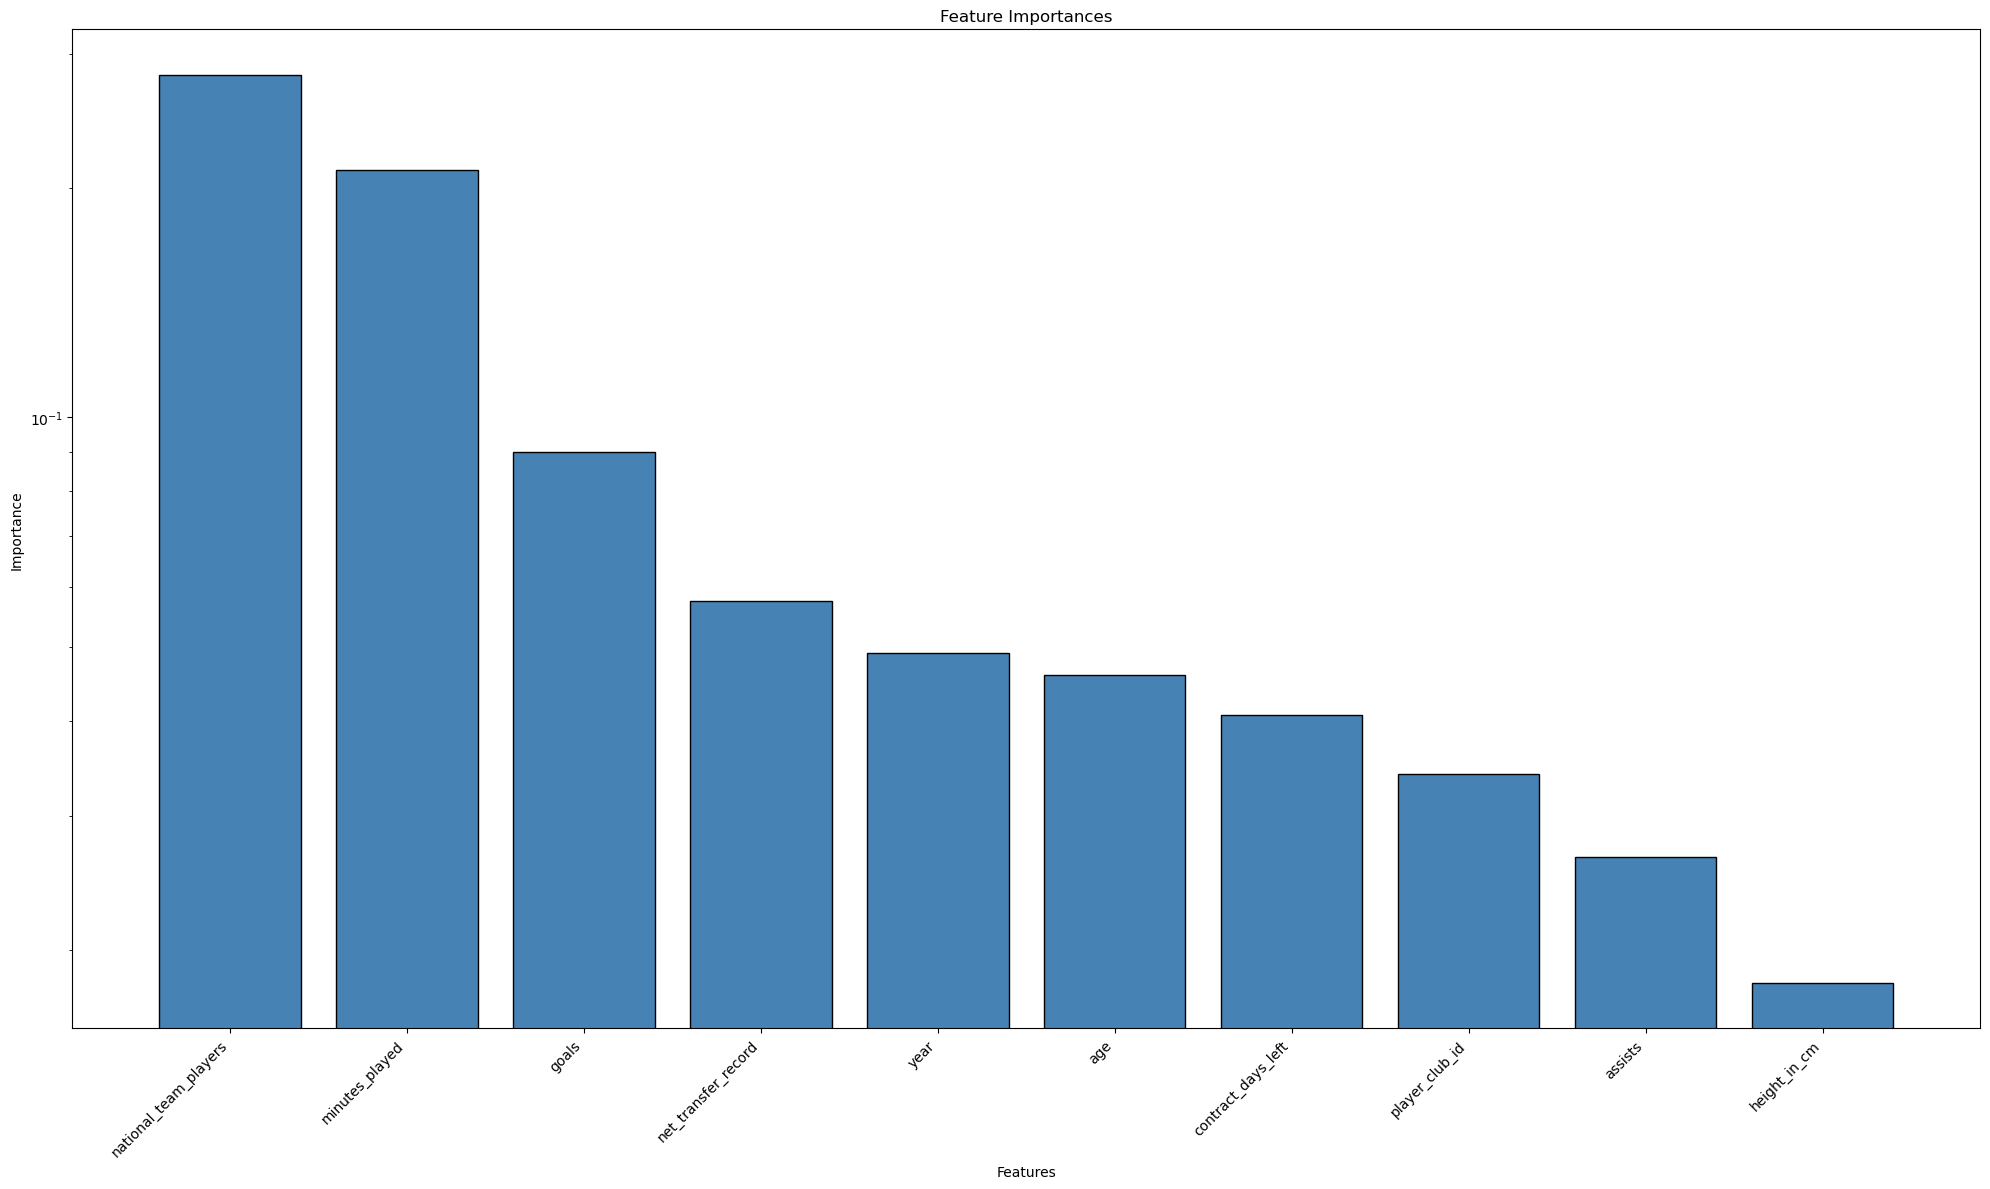

In [58]:
#filter rows where importance  not 0
filtered_importance_df = importance_df[importance_df['Importance'] > 0]

#create stacked bar chart
plt.figure(figsize=(20, 12))
plt.bar(filtered_importance_df['Feature'].head(10), filtered_importance_df['Importance'].head(10), color='steelblue',edgecolor="black")


# log scale my y axis
plt.yscale('log')

#layout graphing
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Differences between the top 10 features pre & post dropping `highest_ever_market_value`:
- The importance of highest_ever_market_value is no longer present and so the other features now play a more significant role.
- `national_team_players` and `minutes_played` have become the most important features, suggesting that these features are crucial for predicting the target variable.
- Other features, like `goals`, `age`, `net_transfer_record`, and `year`, now also contribute more to the model's decisions.
- This shift may be due to the dominance of highest_ever_market_value masking the importance of other features. The new ranking provides a more balanced view of the importance of different features in your decision tree model.

## Ensemble Learning

My cross validated non-linear model has a quite a decent R-Squared Score & MAE but I still think this can be improved upon and hence I'll be deploying ensemble learning to try to get the optimal model for my problem.

## XGBoost

### Unoptimised XGBoost Model

In [10]:
#import XGBoost Regressor
from xgboost import XGBRegressor

#instantiate  & fit
xmodel=XGBRegressor()
xmodel.fit(X_train_s,y_train)

#score
print(xmodel.score(X_train_s,y_train))
print(xmodel.score(X_val_s,y_val))

0.9050514812770661
0.852894900090049


My baseline XGBoost model seems to have quite a similar validation score to the baseline Decision Tree Model except this time it isn't overfitted on my trainset with a score 0.9 as opposed to the almost perfect score in the other models. This looks promising but I should still be looking to increase that validation score through optimising my hyperparameters.

### XGBoost GridSearch

to optimise my hyperparameters, I'll do a Cross-validated Gridsearch like before.

The hyperparameters I'll be tuning are:
- `learning_rate` - how fast the model learns from the residuals of the previous tree.
- `n_estimators` - the number of boosts to perform.
- `max_depth` - how deep each tree can go.
- `min_child_weight`- controls the minimum number of samples (or data points) needed in each leaf node.
- `subsample`- determines the fraction of samples that are randomly chosen to grow trees in each boost, preventing overfitting.

In [51]:
#instantiate xgboost
xgb2=XGBRegressor()

#set up my parameter grid
xparamgrid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [200,400,600],
    'max_depth': [6,9,12,15],
    'min_child_weight': [1,2,4],
    'subsample': [0.8, 0.9, 1.0],
}


In [52]:
#gridsearch
xgbgridsearch = GridSearchCV(xgb2,
                        xparamgrid,
                        cv = 5,
                        verbose=3)


xgbgridsearch.fit(X_train_s,y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.688 total time=   2.3s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.693 total time=   2.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.709 total time=   2.1s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.690 total time=   2.3s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.703 total time=   2.3s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.687 total time=   2.2s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.693 total time=   2.3s
[CV 3/5] END learni

[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.755 total time=   3.9s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.772 total time=   3.9s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.755 total time=   4.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.765 total time=   4.3s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.774 total time=   4.0s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.755 total time=   4.0s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.773 total time=   4.1s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_weight=2, n_estimators=400,

[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.789 total time=   3.4s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.795 total time=   2.9s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.780 total time=   2.8s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.795 total time=   3.5s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.777 total time=   3.0s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.786 total time=   2.8s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.791 total time=   3.1s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_weight=4, n_estimators=600,

[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.786 total time=   2.8s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.771 total time=   2.7s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.769 total time=   2.2s
[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.788 total time=   2.6s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.768 total time=   4.0s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.784 total time=   2.6s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.828 total time=   4.6s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=2, n_estimators=400,

[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.840 total time=   4.4s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.824 total time=   7.3s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.840 total time=   6.2s
[CV 1/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.844 total time=   8.7s
[CV 2/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.853 total time=   6.8s
[CV 3/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.858 total time=   7.8s
[CV 4/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.843 total time=   7.6s
[CV 5/5] END learning_rate=0.01, max_depth=9, min_child_weight=4, n_estimators=600,

[CV 1/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.818 total time=   7.1s
[CV 2/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.817 total time=   5.4s
[CV 3/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.831 total time=   7.1s
[CV 4/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.813 total time=   6.3s
[CV 5/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.832 total time=   6.1s
[CV 1/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.819 total time=   8.3s
[CV 2/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.819 total time=   6.9s
[CV 3/5] END learning_rate=0.01, max_depth=12, min_child_weight=2, n_estimat

[CV 4/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.859 total time=  12.0s
[CV 5/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.879 total time=  11.3s
[CV 1/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.863 total time=  11.2s
[CV 2/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.870 total time=  15.2s
[CV 3/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.877 total time=  13.4s
[CV 4/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.860 total time=  13.0s
[CV 5/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.879 total time=  10.4s
[CV 1/5] END learning_rate=0.01, max_depth=12, min_child_weight=4, n_estimat

[CV 2/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.891 total time=  43.5s
[CV 3/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.902 total time=  41.9s
[CV 4/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.882 total time=  41.3s
[CV 5/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.900 total time=  45.1s
[CV 1/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=1.0;, score=0.877 total time=  47.2s
[CV 2/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=1.0;, score=0.881 total time=  43.6s
[CV 3/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimators=600, subsample=1.0;, score=0.892 total time=  44.0s
[CV 4/5] END learning_rate=0.01, max_depth=15, min_child_weight=1, n_estimat

[CV 5/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.846 total time=  10.5s
[CV 1/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.825 total time=   9.3s
[CV 2/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.825 total time=  11.4s
[CV 3/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.844 total time=  10.8s
[CV 4/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.823 total time=   9.3s
[CV 5/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.842 total time=  11.2s
[CV 1/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.874 total time=  16.5s
[CV 2/5] END learning_rate=0.01, max_depth=15, min_child_weight=4, n_estimat

[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.864 total time=   2.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.849 total time=   2.3s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.863 total time=   2.4s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=600, subsample=0.8;, score=0.873 total time=   5.4s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=600, subsample=0.8;, score=0.876 total time=   5.3s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=600, subsample=0.8;, score=0.879 total time=   3.3s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=600, subsample=0.8;, score=0.867 total time=   3.9s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=600, subsamp

[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.8;, score=0.841 total time=   2.3s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.8;, score=0.838 total time=   1.4s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.8;, score=0.825 total time=   1.2s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.8;, score=0.842 total time=   1.0s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.831 total time=   1.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.839 total time=   1.3s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.840 total time=   1.4s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_weight=4, n_estimators=200, subsamp

[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.891 total time=   4.9s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.893 total time=   3.7s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.905 total time=   3.7s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.888 total time=   6.0s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=0.9;, score=0.900 total time=   5.9s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.889 total time=   3.9s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsample=1.0;, score=0.885 total time=   4.8s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=1, n_estimators=400, subsamp

[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=600, subsample=0.9;, score=0.905 total time=   5.5s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=600, subsample=1.0;, score=0.893 total time=   6.5s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=600, subsample=1.0;, score=0.895 total time=   4.8s
[CV 3/5] END learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=600, subsample=1.0;, score=0.906 total time=   6.8s
[CV 4/5] END learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=600, subsample=1.0;, score=0.889 total time=   6.3s
[CV 5/5] END learning_rate=0.1, max_depth=9, min_child_weight=2, n_estimators=600, subsample=1.0;, score=0.903 total time=   4.9s
[CV 1/5] END learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=200, subsample=0.8;, score=0.873 total time=   1.7s
[CV 2/5] END learning_rate=0.1, max_depth=9, min_child_weight=4, n_estimators=200, subsamp

[CV 3/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.902 total time=  10.5s
[CV 4/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.885 total time=  10.5s
[CV 5/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=200, subsample=1.0;, score=0.895 total time=  10.5s
[CV 1/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.891 total time=  22.1s
[CV 2/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.898 total time=  22.2s
[CV 3/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.906 total time=  22.6s
[CV 4/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=400, subsample=0.8;, score=0.888 total time=  22.8s
[CV 5/5] END learning_rate=0.1, max_depth=12, min_child_weight=1, n_estimators=400,

[CV 1/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.8;, score=0.893 total time=  33.7s
[CV 2/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.8;, score=0.899 total time=  30.7s
[CV 3/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.8;, score=0.907 total time=  32.9s
[CV 4/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.8;, score=0.889 total time=  31.0s
[CV 5/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.8;, score=0.906 total time=  29.7s
[CV 1/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.9;, score=0.889 total time=  30.3s
[CV 2/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600, subsample=0.9;, score=0.899 total time=  30.1s
[CV 3/5] END learning_rate=0.1, max_depth=12, min_child_weight=2, n_estimators=600,

[CV 4/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.884 total time=  25.5s
[CV 5/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.905 total time=  24.8s
[CV 1/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.881 total time=  26.0s
[CV 2/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.896 total time=  26.4s
[CV 3/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.903 total time=  27.4s
[CV 4/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.881 total time=  26.7s
[CV 5/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200, subsample=0.9;, score=0.901 total time=  26.4s
[CV 1/5] END learning_rate=0.1, max_depth=15, min_child_weight=1, n_estimators=200,

[CV 2/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.895 total time=  43.2s
[CV 3/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.904 total time=  43.8s
[CV 4/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.879 total time=  44.6s
[CV 5/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=0.9;, score=0.902 total time=  42.1s
[CV 1/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=1.0;, score=0.878 total time=  39.2s
[CV 2/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=1.0;, score=0.883 total time=  39.1s
[CV 3/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400, subsample=1.0;, score=0.898 total time=  40.5s
[CV 4/5] END learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=400,

[CV 5/5] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.902 total time=  45.9s
[CV 1/5] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.882 total time=  43.8s
[CV 2/5] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.889 total time=  44.5s
[CV 3/5] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.900 total time=  43.5s
[CV 4/5] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.877 total time=  45.5s
[CV 5/5] END learning_rate=0.1, max_depth=15, min_child_weight=4, n_estimators=600, subsample=1.0;, score=0.896 total time=  45.0s
[CV 1/5] END learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.8;, score=0.853 total time=   3.2s
[CV 2/5] END learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=200, s

[CV 3/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.858 total time=   2.5s
[CV 4/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.846 total time=   2.6s
[CV 5/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.861 total time=   2.6s
[CV 1/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.874 total time=   5.8s
[CV 2/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.879 total time=   5.8s
[CV 3/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.877 total time=   5.4s
[CV 4/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=400, subsample=0.8;, score=0.867 total time=   5.5s
[CV 5/5] END learning_rate=0.2, max_depth=6, min_child_weight=2, n_estimators=400, subsamp

[CV 2/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.881 total time=   5.3s
[CV 3/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.885 total time=   5.2s
[CV 4/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.874 total time=   5.4s
[CV 5/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.889 total time=   5.1s
[CV 1/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.884 total time=   5.2s
[CV 2/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.881 total time=   5.5s
[CV 3/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsample=0.9;, score=0.886 total time=   5.4s
[CV 4/5] END learning_rate=0.2, max_depth=6, min_child_weight=4, n_estimators=600, subsamp

[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.887 total time=   3.4s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.883 total time=   3.5s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.896 total time=   3.4s
[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.879 total time=   3.3s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=0.9;, score=0.892 total time=   3.4s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.885 total time=   3.1s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsample=1.0;, score=0.884 total time=   3.1s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=2, n_estimators=200, subsamp

[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.900 total time=   4.2s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.891 total time=   4.7s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.892 total time=   3.5s
[CV 3/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.903 total time=   3.3s
[CV 4/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.884 total time=   3.3s
[CV 5/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=400, subsample=1.0;, score=0.902 total time=   5.3s
[CV 1/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=600, subsample=0.8;, score=0.896 total time=   5.8s
[CV 2/5] END learning_rate=0.2, max_depth=9, min_child_weight=4, n_estimators=600, subsamp

[CV 3/5] END learning_rate=0.2, max_depth=12, min_child_weight=1, n_estimators=600, subsample=1.0;, score=0.898 total time=  16.1s
[CV 4/5] END learning_rate=0.2, max_depth=12, min_child_weight=1, n_estimators=600, subsample=1.0;, score=0.879 total time=  16.0s
[CV 5/5] END learning_rate=0.2, max_depth=12, min_child_weight=1, n_estimators=600, subsample=1.0;, score=0.899 total time=  15.0s
[CV 1/5] END learning_rate=0.2, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.889 total time=   5.6s
[CV 2/5] END learning_rate=0.2, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.889 total time=   4.2s
[CV 3/5] END learning_rate=0.2, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.903 total time=   4.5s
[CV 4/5] END learning_rate=0.2, max_depth=12, min_child_weight=2, n_estimators=200, subsample=0.8;, score=0.875 total time=   5.1s
[CV 5/5] END learning_rate=0.2, max_depth=12, min_child_weight=2, n_estimators=200,

[CV 1/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.887 total time=   9.4s
[CV 2/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.889 total time=   7.7s
[CV 3/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.898 total time=   9.6s
[CV 4/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.880 total time=   9.4s
[CV 5/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.8;, score=0.901 total time=   7.8s
[CV 1/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.884 total time=   9.7s
[CV 2/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400, subsample=0.9;, score=0.891 total time=   8.4s
[CV 3/5] END learning_rate=0.2, max_depth=12, min_child_weight=4, n_estimators=400,

[CV 4/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.8;, score=0.874 total time=  33.2s
[CV 5/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.8;, score=0.900 total time=  30.0s
[CV 1/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.882 total time=  33.3s
[CV 2/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.891 total time=  33.0s
[CV 3/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.895 total time=  34.4s
[CV 4/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.878 total time=  33.0s
[CV 5/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600, subsample=0.9;, score=0.894 total time=  29.0s
[CV 1/5] END learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=600,

[CV 2/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.887 total time=   7.0s
[CV 3/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.898 total time=   8.4s
[CV 4/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.874 total time=   8.2s
[CV 5/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=0.9;, score=0.893 total time=   8.7s
[CV 1/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.874 total time=   6.7s
[CV 2/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.886 total time=   9.1s
[CV 3/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200, subsample=1.0;, score=0.897 total time=   8.2s
[CV 4/5] END learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=200,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [6, 9, 12, 15],
                         'min_child_weight': [1, 2, 4],
                         'n_estimators': [200, 400, 600],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=3)

In [53]:
print(xgbgridsearch.best_params_)
print(xgbgridsearch.best_score_)

{'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 600, 'subsample': 0.8}
0.9009191153116621


In [54]:
#import XGBoost Regressor
from xgboost import XGBRegressor

#instantiate
bestxgb = XGBRegressor(learning_rate= 0.1, max_depth= 9, min_child_weight= 1, n_estimators= 600,subsample=0.8)

#fit
bestxgb.fit(X_train_s,y_train)

# Predictions
y_train_pred_x = bestxgb.predict(X_train_s)
y_val_pred_x = bestxgb.predict(X_val_s)

## Model Evaluation Metrics

### R-Squared Score

In [55]:
#score
print(f"Train Score:{bestxgb.score(X_train_s,y_train)}")
print(f"Validation Score:{bestxgb.score(X_val_s,y_val)}")

Train Score:0.9935238879656135
Validation Score:0.9239370312713371


The R-Squared scores for the hyperparameter optimised XGBoost are very high at approximately 99% and 92% on the train and validation sets respectively indicating that my model is doing very well in explaining the variance on both the train and validation set. We can also have a look at other evaluation metrics to see how our model has improved.

### MAE & MAPE

In [56]:
#calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred_x)
mae_val = mean_absolute_error(y_val, y_val_pred_x)

#calculate MAPE
percentage_error_train = mean_absolute_error(y_train, y_train_pred_x) / y_train.mean() * 100
percentage_error_val = mean_absolute_error(y_val, y_val_pred_x) / y_val.mean() * 100


print("\nTrain MAE:", round(mae_train))
print("Validation MAE:",round(mae_val))

print(f"\nTrain MAPE:{round(percentage_error_train)}%")
print(f"Validation MAPE:{round(percentage_error_val)}%")


Train MAE: 548929
Validation MAE: 1366977

Train MAPE:11%
Validation MAPE:27%


Our MAE for the training set is impressively low, suggesting that the model's predictions doesnt deviate much from the actual value. This is also supported by the low MAPE score of 11%, indicating a relatively small percentage deviation from the true value. However, the performance on the validation set tells a slightly different story. The MAE is noticeably higher, implying that the model's predictions deviate more from the true values in the unseen data. The corresponding MAPE of 27% reinforces this point.These scores on the validation set aren't very far off from my final decision tree model which isn't great. Perhaps, my model is still overfitting on the train set but this is just the best we can do given the circumstances.

### Feature Importance

We can now plot which features were most important in the XGBoost Model.

In [59]:
#Create importance dataframe
featureimportancex=pd.DataFrame({'Feature': X_train_s.columns, 'Importance': bestxgb.feature_importances_})

#sort in desc order
featureimportancex= featureimportancex.sort_values(by='Importance', ascending=False)

#display the top 10 feature importances
featureimportancex.head(10)

,Feature,Importance
13,national_team_players,0.147509
45,league_id_SC1,0.144377
38,league_id_GB1,0.036635
10,minutes_played,0.033739
33,sub_position_Second Striker,0.033563
36,league_id_ES1,0.031882
6,goals,0.031815
12,net_transfer_record,0.022355
49,Country_Belgium,0.021987
35,league_id_DK1,0.019562


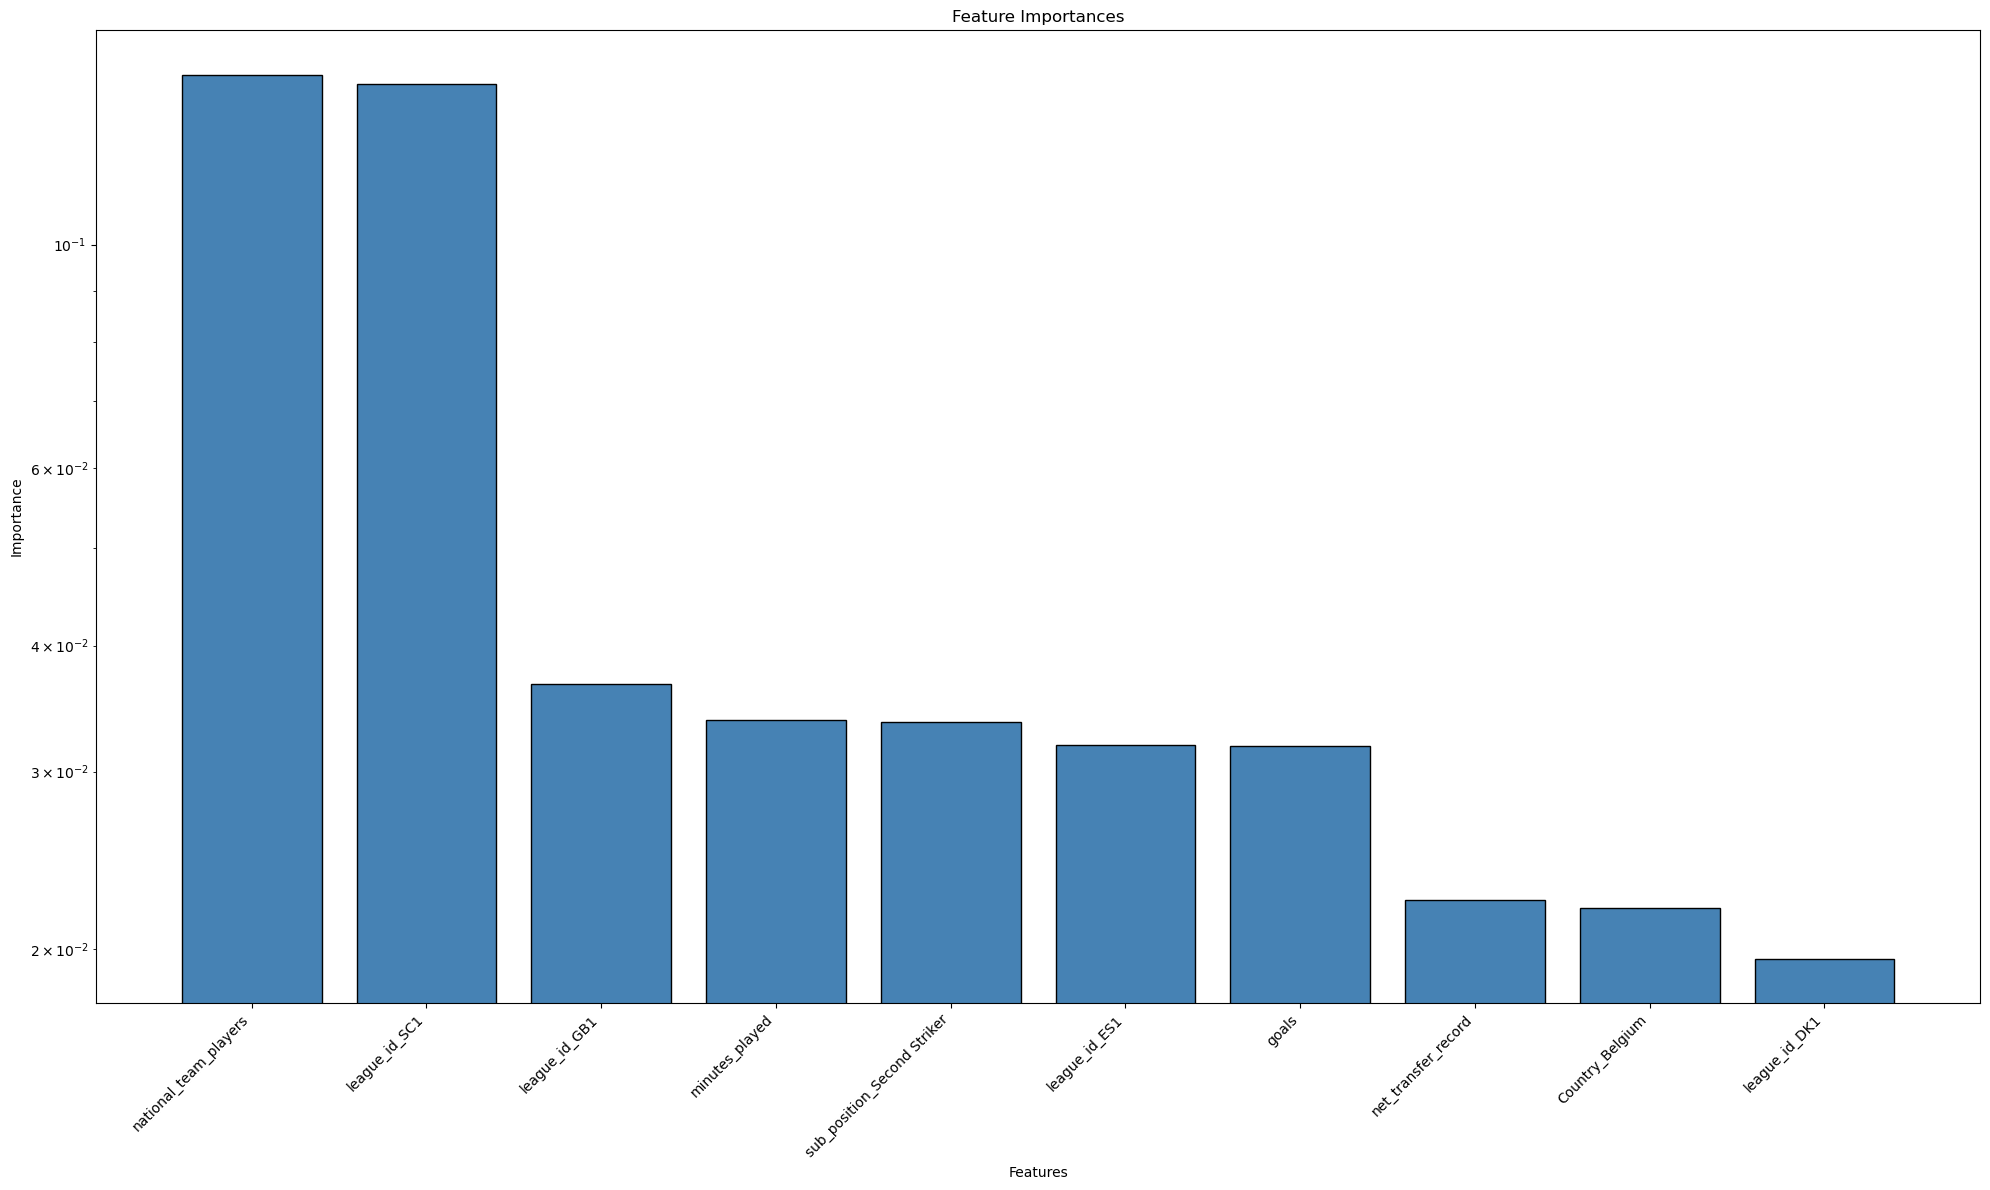

In [60]:

#create stacked bar chart of the top 10
plt.figure(figsize=(20, 12))
plt.bar(featureimportancex['Feature'].head(10), featureimportancex['Importance'].head(10), color='steelblue',edgecolor="black")


# log scale my y axis
plt.yscale('log')

#layout graphing
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

`national_team_players`: The count of national team players within a team emerges as the most crucial feature in predicting player market values, indicating the importance of national-level talent in valuation. This is somewhat expected.

`league_id_SC1`: Very suprisingly, the scottish football league (SC1) holds substantial importance. This is unexpected.

`league_id_GB1`: Similarly, the league_id_GB1 feature is influential, emphasizing the significance of the British Premier League in predicting market value. This is expected.

`minutes_played`: Playing time remains a significant predictor, reinforcing the idea that actively participating players tend to have higher market values. This is expected.

`sub_position_Second Striker`: The specific sub-position of Second Striker carries notable importance, highlighting the impact of specialized playing roles on market values. This is expected..

`league_id_ES1`: Another league identifier (ES1) plays a role in predicting market values, indicating that Spanish football league are influential. This is expected.

`goals`: Goal-scoring ability emerges as a key factor, underlining the strong connection between a player's scoring prowess and their market value. This is expected.

`net_transfer_record`: The net transfer record of a club is a meaningful predictor, reflecting the financial health and investment patterns of the team in determining player values. This is expected.

`Country_Belgium`: The inclusion of the country Belgium as a feature suggests that the nationality or origin of a player influences market values. This is unexpected.

`league_id_DK1`: The Danish league (DK1) also holds some importance, indicating that players from this league exhibit distinct market value characteristics. This is unexpected.